In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import warnings

In [2]:
df = pd.read_excel('Zadacha.xlsx')

In [3]:
df

,Регион,Группа материалов,Название материала,ID Материала,Количество в заказе (шт),Дата заявки,Сумма заказа без НДС,Завод-потребитель в заявке
0,Кузбасс,Такелажные изделия,СТРОП УСК1-3-3000,1800099009,2,2022-12-12,1702.00,U633
1,Кузбасс,Такелажные изделия,СТРОП СТПК-30-10000,1800635587,3,2022-12-12,30429.00,U633
2,Кузбасс,Такелажные изделия,"СТРОП УСК1-1,6-3000",1799996348,3,2022-12-12,1710.00,U633
3,Кузбасс,Такелажные изделия,СТРОП УСК1-3-3000,1800099009,3,2022-12-12,2553.00,U633
4,Кузбасс,Такелажные изделия,СТРОП УСК1-3-4000,1799964780,9,2022-12-12,9225.00,U633
...,...,...,...,...,...,...,...,...
58653,Красноярский край,Инструмент и спецоснастка,НАБОР КОЛЬЦЕСЪЕМНИКОВ KN-001957S3,1800134415,1,2022-04-22,3080.17,V113
58654,Красноярский край,Инструмент и спецоснастка,ДЛИННОГУБЦЫ UNIFOX-P VDE 1212204,1800586777,2,2022-05-12,1994.48,V113
58655,Кузбасс,Инструмент и спецоснастка,ПАССАТИЖИ 180ММ MATRIX,1800166128,1,2022-01-11,0.00,U112
58656,Казахстан,Инструмент и спецоснастка,ТЕЛЕЖКА ИНСТРУМЕНТ GARWIN EQ-000012,1800691435,2,2022-11-08,145811.90,E52C


###                 В первую очередь, рассмотрим выборку на отклонения:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58658 entries, 0 to 58657
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Регион                      58658 non-null  object        
 1   Группа материалов           58658 non-null  object        
 2   Название материала          58658 non-null  object        
 3   ID Материала                58658 non-null  int64         
 4   Количество в заказе (шт)    58658 non-null  int64         
 5   Дата заявки                 58658 non-null  datetime64[ns]
 6   Сумма заказа  без НДС       58658 non-null  float64       
 7   Завод-потребитель в заявке  58658 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.6+ MB


In [5]:
#Нулей нет, далее на дублирующиеся строки:

df[df.duplicated()]

,Регион,Группа материалов,Название материала,ID Материала,Количество в заказе (шт),Дата заявки,Сумма заказа без НДС,Завод-потребитель в заявке
49,Красноярский край,Сварочные электроды,ЭЛЕКТРОД УОНИ-13/55 4ММ ГОСТ9466-75,1799970257,1,2022-09-26,116500.0,V311
54,Алтайский край,Сварочные электроды,ЭЛЕКТРОД УОНИ-13/55 4ММ ГОСТ9466-75,1799970257,1,2022-11-19,138000.0,W111
66,Кузбасс,Сварочные электроды,ЭЛЕКТРОД УОНИ-13/55 4ММ ГОСТ9466-75,1799970257,1,2022-11-14,125320.0,U111
101,Красноярский край,Сварочные электроды,ЭЛЕКТРОД МР-3 4ММ ГОСТ9466-75,1799970218,1,2022-09-26,143950.0,V311
172,Красноярский край,Сварочные электроды,ЭЛЕКТРОД МР-3 3ММ ГОСТ9466-75,1799970304,1,2022-10-24,115000.0,V211
...,...,...,...,...,...,...,...,...
58548,Кузбасс,Сварочные электроды,ЭЛЕКТРОД МР-3 ЛЮКС 3ММ ГОСТ9466-75,1800590643,1,2022-01-20,140000.0,5N16
58554,Кузбасс,Сварочные электроды,ЭЛЕКТРОД МР-3 2ММ ГОСТ9466-75,1800262249,1,2022-01-20,207500.0,5N16
58566,Кузбасс,Сварочные электроды,ЭЛЕКТРОД МР-3 3ММ ГОСТ9466-75 (КГ),1800156094,80,2022-01-20,10908.8,5N16
58612,Красноярский край,Инструмент и спецоснастка,НАБОР ТОРЦ КЛЮЧЕЙ HAUPA 102512 7ПРЕДМ.,1800599767,5,2021-10-13,46150.0,V116


#### Здесь хорошо бы уточнить, стоит ли рассматривать задвоенные заявки, или же, в случае отмены заказа со стороны заказчика - игнорировать данные строки. <br>


In [6]:
#Стоит взглянуть есть ли строки с нулевой суммой заказа.

df[df['Сумма заказа  без НДС'] == 0]

,Регион,Группа материалов,Название материала,ID Материала,Количество в заказе (шт),Дата заявки,Сумма заказа без НДС,Завод-потребитель в заявке
6783,Красноярский край,Сварочные электроды,ЭЛЕКТРОД ТМЛ-1У 3ММ,1800500944,2,2023-02-08,0.0,U636
6784,Красноярский край,Сварочные электроды,ЭЛЕКТРОД ТМЛ-1У 4ММ,1800500945,3,2023-02-08,0.0,U636
6793,Красноярский край,Сварочные электроды,"ПРОВОЛОКА СВАРОЧНАЯ 2,0 СВ-08ХГСМФА",1800501021,360,2023-07-28,0.0,U636
7737,Алтайский край,Инструмент и спецоснастка,БИТА HILTI S-B PH2 50/2 IM 2039126 5ШТ,1800700177,2,2023-03-20,0.0,W112
7977,Алтайский край,Сварочные электроды,ПРОВОЛОКА СВ08ХГСМФА-О D2ММ ГОСТ2246-70,1800501005,12,2023-03-27,0.0,U632
...,...,...,...,...,...,...,...,...
43373,Кузбасс,Сварочные электроды,ЭЛЕКТРОД ТМЛ-3У 4ММ ТУ1272-022-0105589,1800092408,1,2022-01-19,0.0,U637
43374,Кузбасс,Сварочные электроды,ЭЛЕКТРОД ТМЛ-3У 4ММ ТУ1272-022-0105589,1800092408,1,2022-03-04,0.0,U637
45885,Кузбасс,Инструмент и спецоснастка,ПИКА П-11/000-000-С240-060-00,1800185029,4,2022-08-18,0.0,5N02
48900,Кузбасс,Инструмент и спецоснастка,НАБОР КЛЮЧЕЙ КОМБ 6-32ММ 12B4MRN 24ШТ,1800711846,8,2022-10-20,0.0,5N15


In [7]:
df['Сумма заказа  без НДС'] = df['Сумма заказа  без НДС'].replace(0, pd.np.nan)
df = df.dropna(subset=['Сумма заказа  без НДС'])

C:\Users\Михаил\AppData\Local\Temp\ipykernel_7448\4250394839.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Сумма заказа  без НДС'] = df['Сумма заказа  без НДС'].replace(0, pd.np.nan)


In [8]:
df[df['Сумма заказа  без НДС'] == 0]

,Регион,Группа материалов,Название материала,ID Материала,Количество в заказе (шт),Дата заявки,Сумма заказа без НДС,Завод-потребитель в заявке


### <span style="color:red"> !Я удалил строки с суммой заказа равной нулю, потому что посчитал их ошибочными и не содержательными.

### Переходим к ответам на вопросы:

1. Определить какие группы материалов выросли в цене в (июль-август 2023),  по сравнению с прошлым годом. Сделать предположение причины роста.
2. Какая доля пересечения материалов(товаров) по регионам
3. Сделать прогноз оборота на конец 23-го года по регионам и показать отклонение к 22-у году.

#### 1. Определить какие группы материалов выросли в цене в (июль-август 2023),  по сравнению с прошлым годом.

In [9]:
#Ниже - фильтрация выборки:
df78 = df[((df['Дата заявки'].dt.month == 7) | (df['Дата заявки'].dt.month == 8)) &
                 ((df['Дата заявки'].dt.year == 2022) | (df['Дата заявки'].dt.year == 2023))]

#Далее разделим выбоку на 22 и 23 год:
df22 = df78[df78['Дата заявки'].dt.year == 2022]
df23 = df78[df78['Дата заявки'].dt.year == 2023]

#Сейчас сгруппируем штуки по группам и сумму заказа по группам для датафреймов выше:
a = df22.groupby('Группа материалов')['Сумма заказа  без НДС'].sum()
b = df22.groupby('Группа материалов')['Количество в заказе (шт)'].sum()
c = df23.groupby('Группа материалов')['Сумма заказа  без НДС'].sum()
d = df23.groupby('Группа материалов')['Количество в заказе (шт)'].sum()

a22 = pd.DataFrame(a/b, columns=['За штуку в 22г.'])
a23 = pd.DataFrame(c/d, columns=['За штуку в 23г.'])

In [10]:
#Объединим датафреймы.

df1 = pd.merge(a22, a23, on='Группа материалов', how='left')
df1 = pd.merge(df1, a, on='Группа материалов', how='left')
df1 = pd.merge(df1, b, on='Группа материалов', how='left')
df1 = pd.merge(df1, c, on='Группа материалов', how='left')
df1 = pd.merge(df1, d, on='Группа материалов', how='left')
df1.columns = ['За штуку в 22г.', 'За штуку в 23г.', 'Заказ 22, руб.', 'Заказ 22, шт.', 'Заказ 23, руб.', 'Заказ 23, шт.']
df1 = df1.round(1)
df1

,За штуку в 22г.,За штуку в 23г.,"Заказ 22, руб.","Заказ 22, шт.","Заказ 23, руб.","Заказ 23, шт."
Группа материалов,,,,,,
Газосварочные агрегаты,6694.8,NaN,334741.5,50,NaN,NaN
Запасные части к средствам малой механизации,4917.1,NaN,177015.4,36,NaN,NaN
Инструмент и спецоснастка,837.6,604.4,32556088.7,38870,5681673.6,9401.0
Сварочные электроды,4816.2,30442.8,95116080.8,19749,8006457.7,263.0
Средства для подъема груза ручные,7175.3,19877.9,1076302.3,150,655971.8,33.0
Средства малой механизации,39694.7,29723.4,21395467.6,539,3210129.0,108.0
Такелажные изделия,685.7,1194.6,9369869.1,13665,142154.7,119.0
Электроизмерительные приборы,32671.2,14623.2,1372191.3,42,380202.8,26.0
Электросварочное и газопламенное оборудование,42305.2,63890.8,2792143.6,66,255563.0,4.0


In [11]:
#В 23 году нет факта продаж двух групп "Газосварочные агрегаты" и "Запасные части к средствам малой механизации" - удалю их.

df1 = df1.dropna()
df1 = df1.astype(int)
df1

,За штуку в 22г.,За штуку в 23г.,"Заказ 22, руб.","Заказ 22, шт.","Заказ 23, руб.","Заказ 23, шт."
Группа материалов,,,,,,
Инструмент и спецоснастка,837,604,32556088,38870,5681673,9401
Сварочные электроды,4816,30442,95116080,19749,8006457,263
Средства для подъема груза ручные,7175,19877,1076302,150,655971,33
Средства малой механизации,39694,29723,21395467,539,3210129,108
Такелажные изделия,685,1194,9369869,13665,142154,119
Электроизмерительные приборы,32671,14623,1372191,42,380202,26
Электросварочное и газопламенное оборудование,42305,63890,2792143,66,255563,4


In [12]:
#Создадим столбцы прироста

df1['Прирост в цене, %'] = (df1['За штуку в 23г.'] / df1['За штуку в 22г.'] * 100 - 100).round(2)
df1.sort_values(by='Прирост в цене, %', ascending = False)

,За штуку в 22г.,За штуку в 23г.,"Заказ 22, руб.","Заказ 22, шт.","Заказ 23, руб.","Заказ 23, шт.","Прирост в цене, %"
Группа материалов,,,,,,,
Сварочные электроды,4816,30442,95116080,19749,8006457,263,532.10
Средства для подъема груза ручные,7175,19877,1076302,150,655971,33,177.03
Такелажные изделия,685,1194,9369869,13665,142154,119,74.31
Электросварочное и газопламенное оборудование,42305,63890,2792143,66,255563,4,51.02
Средства малой механизации,39694,29723,21395467,539,3210129,108,-25.12
Инструмент и спецоснастка,837,604,32556088,38870,5681673,9401,-27.84
Электроизмерительные приборы,32671,14623,1372191,42,380202,26,-55.24


#### Итак, в цене выросли четыре группы, показанные выше в датафрейме

In [13]:
#Рассмотрим пиковую группу, чтобы выяснить возможные причины роста цен.

df2 = df22[df22['Группа материалов'] == 'Сварочные электроды']
df3 = df23[df23['Группа материалов'] == 'Сварочные электроды']
df2 = df2.groupby('Регион')['Количество в заказе (шт)'].sum()
df3 = df3.groupby('Регион')['Количество в заказе (шт)'].sum()
pd.merge(df2, df3, on='Регион', how='left')

,Количество в заказе (шт)_x,Количество в заказе (шт)_y
Регион,,
Алтайский край,8671,NaN
Краснодарский край,76,NaN
Красноярский край,2866,216.0
Кузбасс,8136,47.0


##### Взаимодействие регионов с компанией заметно снизилось в сравнении с прошлым годом.

In [14]:
#Сделаем аналогично по заводам

df4 = df22[df22['Группа материалов'] == 'Сварочные электроды']
df5 = df23[df23['Группа материалов'] == 'Сварочные электроды']
df4 = df4.groupby('Завод-потребитель в заявке')['Количество в заказе (шт)'].sum()
df5 = df5.groupby('Завод-потребитель в заявке')['Количество в заказе (шт)'].sum()
pd.merge(df4, df5, on='Завод-потребитель в заявке', how='outer')

,Количество в заказе (шт)_x,Количество в заказе (шт)_y
Завод-потребитель в заявке,,
2104,373.0,NaN
2403,362.0,NaN
5301,20.0,NaN
5401,800.0,NaN
5N02,57.0,NaN
5N06,3.0,NaN
5N13,44.0,NaN
5N14,273.0,NaN
5N16,66.0,NaN


##### Прежние клиенты часто отказываются в приобретении услуг

In [15]:
#Взглянем на динамику продаж в штуках для данных групп

dynamics = df[(df['Группа материалов'] == 'Сварочные электроды') | 
                (df['Группа материалов'] == 'Средства для подъема груза ручные') |
               (df['Группа материалов'] == 'Такелажные изделия') |
               (df['Группа материалов'] == 'Электросварочное и газопламенное оборудование')] 
dynamics

,Регион,Группа материалов,Название материала,ID Материала,Количество в заказе (шт),Дата заявки,Сумма заказа без НДС,Завод-потребитель в заявке
0,Кузбасс,Такелажные изделия,СТРОП УСК1-3-3000,1800099009,2,2022-12-12,1702.0,U633
1,Кузбасс,Такелажные изделия,СТРОП СТПК-30-10000,1800635587,3,2022-12-12,30429.0,U633
2,Кузбасс,Такелажные изделия,"СТРОП УСК1-1,6-3000",1799996348,3,2022-12-12,1710.0,U633
3,Кузбасс,Такелажные изделия,СТРОП УСК1-3-3000,1800099009,3,2022-12-12,2553.0,U633
4,Кузбасс,Такелажные изделия,СТРОП УСК1-3-4000,1799964780,9,2022-12-12,9225.0,U633
...,...,...,...,...,...,...,...,...
58573,Кузбасс,Сварочные электроды,ЭЛЕКТРОД МР-3С 4ММ ГОСТ9466-75,1800033134,1,2022-01-20,134200.0,5N16
58587,Краснодарский край,Электросварочное и газопламенное оборудование,ИНВЕРТОР СВАРОЧНЫЙ WESTER MINI 220T MMA,4800024227,2,2022-05-20,28481.5,9A01
58590,Кузбасс,Средства для подъема груза ручные,"ТАЛЬ РУЧ ГП1,6Т Н3М KITO LB016S030 LOS",4800021572,1,2022-09-10,58200.0,5N05
58591,Кузбасс,Средства для подъема груза ручные,"ТАЛЬ РУЧ ГП3,2Т Н3М KITO LB032S030 SYH",4800021533,1,2022-09-10,76410.0,5N05


In [16]:
warnings.filterwarnings('ignore')
dynamics21 = dynamics[dynamics['Дата заявки'].dt.year == 2021]
dynamics22 = dynamics[dynamics['Дата заявки'].dt.year == 2022]
dynamics23 = dynamics[dynamics['Дата заявки'].dt.year == 2023]
dynamics21['Дата заявки'] = pd.to_datetime(dynamics21['Дата заявки']).dt.strftime('%m')
dynamics22['Дата заявки'] = pd.to_datetime(dynamics22['Дата заявки']).dt.strftime('%m')
dynamics23['Дата заявки'] = pd.to_datetime(dynamics23['Дата заявки']).dt.strftime('%m')

In [17]:
dynamics21 = dynamics21.groupby('Дата заявки')['Количество в заказе (шт)'].sum()
dynamics22 = dynamics22.groupby('Дата заявки')['Количество в заказе (шт)'].sum()
dynamics23 = dynamics23.groupby('Дата заявки')['Количество в заказе (шт)'].sum()

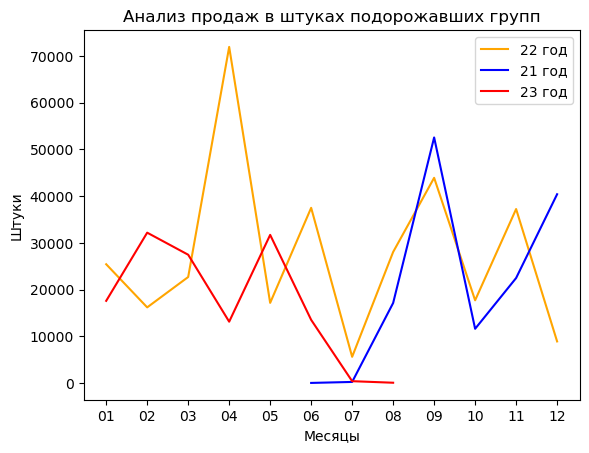

In [18]:
x = np.linspace(1, 12, 1)
plt.plot(dynamics22, label='22 год', color='orange')
plt.plot(dynamics21, label='21 год', color='blue')
plt.plot(dynamics23, label='23 год', color='red')
plt.title('Анализ продаж в штуках подорожавших групп')
plt.xlabel('Месяцы')
plt.ylabel('Штуки')
plt.legend(loc='upper right')

#### На графике выше видно, что тенденция продаж в штуках в 23 году упала в сравнении с 22. Минимальный спрос всегда приходился на 7 месяц, но в 23 году это было беспецедентно - 8 месяц околонулевой в данных группах (выборка была 18-ого числа актуальности). Есть вероятность, что динамика в 9-11 месяцях выправится, но факт продаж уже не будет на уровне предыдущих лет.

##### Судя по данным, прирост стоимости групп может заключаться в: <br> 1. Дефиците артикулов<br> 2. Рост стоимости сырья <br>3. Рост стоимости транспортировки <br>К сожалению, представленной информации недостаточно, чтобы выявить более точную причину.

### 2. Какая доля пересечения материалов(товаров) по регионам

##### 2.1 Вычисление доли пересечения без учета кол-ва продаж

In [19]:
# Группировка и агрегация данных
grouped = df.groupby(['Название материала', 'Регион']).size().reset_index(name='Количество')

# Создание функции для вычисления доли пересечения без учета кол-ва продаж
def calculate_overlap_ratio(group):
    total_count = group['Количество'].sum()
    group['Доля пересечения'] = group['Количество'] / total_count
    return group

# Применение функции к данным
result_df = grouped.groupby('Регион', group_keys=True).apply(calculate_overlap_ratio)
result_df.sort_values(by='Доля пересечения', ascending=False)

Название материала  \
Регион                                                           
Иркутский      11695                      ПЛАСТИНА 301940 LNMX   
Алтайский край 18742         ЭЛЕКТРОД ОК 46.00 3ММ ГОСТ9467-75   
Казахстан      8534       НАБОР ИНСТРУМЕНТА FORCE 41421R 142ШТ   
               18675             ЭЛЕКТРОД МР-3 4ММ ГОСТ9466-75   
               18852  ЭЛЕКТРОД УОНИ 13/55 4ММ ГОСТ9466-75 (КГ)   
...                                                        ...   
Кузбасс        8182    НАБОР БУРОВ 6-8-10*110 MATRIX 71096 6ПР   
               8181            НАБОР БУРОВ 5-20ММ 71097 12ПРЕД   
               8178    НАБОР БУРОВ 5-12ММ MILWAUKEE 4932352339   
               179     АППАРАТ СВАРКИ ПЛ.ТРУБ ELITECH СПТ 1500   
               19092             ЯЩИК ПЛАСТИКОВЫЙ 621621 UNIOR   

                              Регион  Количество  Доля пересечения  
Регион                                                              
Иркутский      11695       Иркутский          62          0.026327  
Алтайский край 18742  Алтайский край         134          0.018884  
Казахстан      8534        Казахстан           4          0.015444  
               18675       Казахстан           4          0.015444  
               18852       Казахстан           4          0.015444  
...                              ...         ...               ...  
Кузбасс        8182          Кузбасс           1          0.000039  
               8181          Кузбасс           1          0.000039  
               8178          Кузбасс           1          0.000039  
               179           Кузбасс           1          0.000039  
               19092         Кузбасс           1          0.000039  

[19093 rows x 4 columns]

##### 2.2 Вычисление доли пересечения с учетом кол-ва продаж

In [20]:
# Группировка и агрегация данных
grouped = df.groupby(['Название материала', 'Регион'])['Количество в заказе (шт)'].sum().reset_index(name='Сумма продаж')

# Создание функции для вычисления доли пересечения с учетом кол-ва продаж
def calculate_overlap_ratio(group):
    total_sales = group['Сумма продаж'].sum()
    group['Доля пересечения'] = group['Сумма продаж'] / total_sales
    return group

# Применение функции к данным
result_df = grouped.groupby('Регион', group_keys=True).apply(calculate_overlap_ratio)
result_df.sort_values(by='Доля пересечения', ascending=False)

Название материала  \
Регион                                                           
Алтайский край 18747         ЭЛЕКТРОД ОК 46.00 4ММ ГОСТ9467-75   
Казахстан      18852  ЭЛЕКТРОД УОНИ 13/55 4ММ ГОСТ9466-75 (КГ)   
               2281      ДИСК ОТРЕЗНОЙ 230*2,5*22 0669.202.325   
               2309    ДИСК ОТРЕЗНОЙ П/МЕТ 180*1,8*22,2 39990Т   
Иркутский      18610   ЭЛЕКТРОД ESAB ОК CARBON 8*305 ГОСТ10720   
...                                                        ...   
Кузбасс        12429        ПОЛКА НА ПЕРФОРАЦИЮ СОРОКИН 35.590   
               16760      ФИЛЬТР ВЛАГООТДЕЛИТЕЛЬ МАСТАК 690-51   
               16767        ФИЛЬТР ГЛАВНЫЙ КАРМАННЫЙ ФК-3011-Т   
               12399   ПОДМОСТИ РАСКЛАДНЫЕ АЛЮМИНИЕВЫЕ ПРА-0,9   
               3623                             КЛЕЩИ НМ-35-39   

                              Регион  Сумма продаж  Доля пересечения  
Регион                                                                
Алтайский край 18747  Алтайский край         30743          0.253181  
Казахстан      18852       Казахстан           934          0.179133  
               2281        Казахстан           860          0.164941  
               2309        Казахстан           840          0.161105  
Иркутский      18610       Иркутский          5690          0.128753  
...                              ...           ...               ...  
Кузбасс        12429         Кузбасс             1          0.000001  
               16760         Кузбасс             1          0.000001  
               16767         Кузбасс             1          0.000001  
               12399         Кузбасс             1          0.000001  
               3623          Кузбасс             1          0.000001  

[19093 rows x 4 columns]

### 3. Прогноз оборота на конец 23-го года по регионам и показать отклонение к 22-у году.

In [21]:
#Взглянем на динамику по регионам

A21 = df[(df['Дата заявки'].dt.year == 2021) & (df['Регион'] == 'Алтайский край')]
A22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Алтайский край')]
A23 = df[(df['Дата заявки'].dt.year == 2023) & (df['Регион'] == 'Алтайский край')]

In [22]:
warnings.filterwarnings('ignore')
A21['Дата заявки'] = pd.to_datetime(A21['Дата заявки']).dt.strftime('%m')
A22['Дата заявки'] = pd.to_datetime(A22['Дата заявки']).dt.strftime('%m')
A23['Дата заявки'] = pd.to_datetime(A23['Дата заявки']).dt.strftime('%m')

In [23]:
A21 = A21.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
A22 = A22.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
A23 = A23.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000

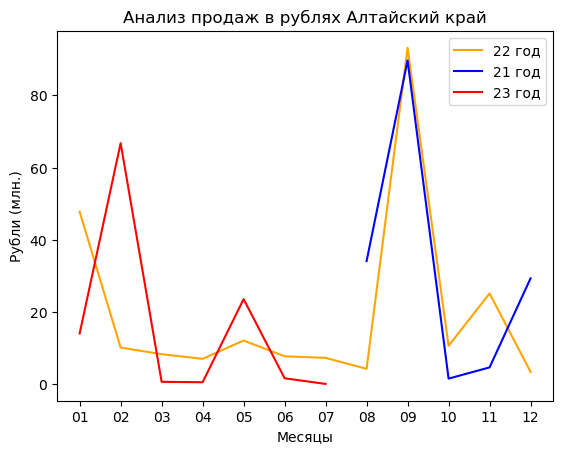

In [24]:
x = np.linspace(1, 12, 1)
plt.plot(A22, label='22 год', color='orange')
plt.plot(A21, label='21 год', color='blue')
plt.plot(A23, label='23 год', color='red')
plt.title('Анализ продаж в рублях Алтайский край')
plt.xlabel('Месяцы')
plt.ylabel('Рубли (млн.)')
plt.legend(loc='upper right')

#### 3-7 месяцы значительно ниже 22ого года, динамика идет на спад. 8 месяц нулевой на момент выгрузки. Однако, есть шанс на увеличение продаж, т.к. 1-2 месяц 23 года выше 1-2 месяца 22 года. Продажи в рублях в 9-12 месяцах 23 года стоит ожидать в районе 80% факта 22 года.

In [25]:
warnings.filterwarnings('ignore')
A22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Алтайский край')]
A22['Дата заявки'] = pd.to_datetime(A22['Дата заявки']).dt.strftime('%m')
A22['Дата заявки'] = A22['Дата заявки'].astype(int)

In [26]:
A22 = A22[(A22['Дата заявки'] == 9) | (A22['Дата заявки'] == 10) | (A22['Дата заявки'] == 11) | (A22['Дата заявки'] == 12)]
result = A22.groupby('Регион')['Сумма заказа  без НДС'].sum()/1000000
resultA = result.apply(lambda x: '{:.0f} миллионов рублей'.format(x*0.8))
resultA = resultA[0]
print(resultA,'- прогноз на конец года для Алтайского края')

106 миллионов рублей - прогноз на конец года для Алтайского края


In [27]:
#Взглянем на динамику по Иркутску

I21 = df[(df['Дата заявки'].dt.year == 2021) & (df['Регион'] == 'Иркутский')]
I22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Иркутский')]
I23 = df[(df['Дата заявки'].dt.year == 2023) & (df['Регион'] == 'Иркутский')]

In [28]:
warnings.filterwarnings('ignore')
I21['Дата заявки'] = pd.to_datetime(I21['Дата заявки']).dt.strftime('%m')
I22['Дата заявки'] = pd.to_datetime(I22['Дата заявки']).dt.strftime('%m')
I23['Дата заявки'] = pd.to_datetime(I23['Дата заявки']).dt.strftime('%m')

In [29]:
I21 = I21.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
I22 = I22.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
I23 = I23.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000

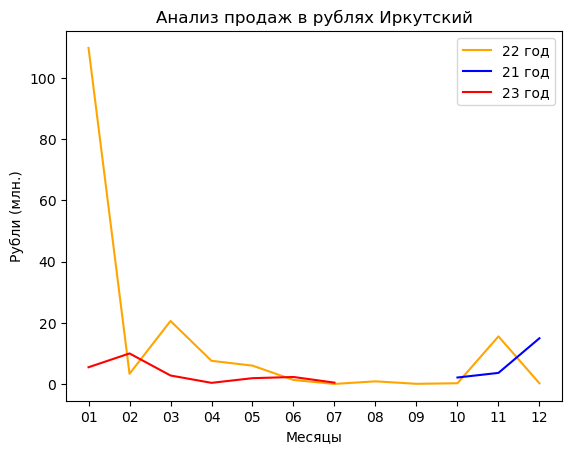

In [30]:
x = np.linspace(1, 12, 1)
plt.plot(I22, label='22 год', color='orange')
plt.plot(I21, label='21 год', color='blue')
plt.plot(I23, label='23 год', color='red')
plt.title('Анализ продаж в рублях Иркутский')
plt.xlabel('Месяцы')
plt.ylabel('Рубли (млн.)')
plt.legend(loc='upper right')

#### Виден разовый всплеск 01.22, более такого не повторялось. Динамика в 23 заметно ниже 22. Сложно сказать, возможен ли данный всплеск еще раз. Но можно хотябы предположить, что вторая половина 23 будет эквивалентна второй половине 22.

In [31]:
warnings.filterwarnings('ignore')
A22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Иркутский')]
A22['Дата заявки'] = pd.to_datetime(A22['Дата заявки']).dt.strftime('%m')
A22['Дата заявки'] = A22['Дата заявки'].astype(int)

In [32]:
A22 = A22[(A22['Дата заявки'] == 9) | (A22['Дата заявки'] == 10) | (A22['Дата заявки'] == 11) | (A22['Дата заявки'] == 12)]
result = A22.groupby('Регион')['Сумма заказа  без НДС'].sum()/1000000
result = result.apply(lambda x: '{:.0f} миллионов рублей'.format(x*1))
resultI = result[0]
print(resultI,'- прогноз на конец года для Иркутского региона')

16 миллионов рублей - прогноз на конец года для Иркутского региона


In [33]:
#Взглянем на динамику по Казахстану

K21 = df[(df['Дата заявки'].dt.year == 2021) & (df['Регион'] == 'Казахстан')]
K22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Казахстан')]
K23 = df[(df['Дата заявки'].dt.year == 2023) & (df['Регион'] == 'Казахстан')]

In [34]:
warnings.filterwarnings('ignore')
K21['Дата заявки'] = pd.to_datetime(K21['Дата заявки']).dt.strftime('%m')
K22['Дата заявки'] = pd.to_datetime(K22['Дата заявки']).dt.strftime('%m')
K23['Дата заявки'] = pd.to_datetime(K23['Дата заявки']).dt.strftime('%m')

In [35]:
K21 = K21.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
K22 = K22.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
K23 = K23.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000

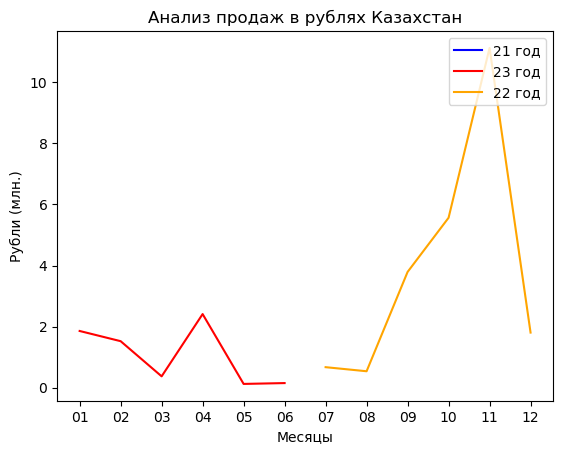

In [36]:
x = np.linspace(1, 12, 1)
plt.plot(K21, label='21 год', color='blue')
plt.plot(K23, label='23 год', color='red')
plt.plot(K22, label='22 год', color='orange')
plt.title('Анализ продаж в рублях Казахстан')
plt.xlabel('Месяцы')
plt.ylabel('Рубли (млн.)')
plt.legend(loc='upper right')

##### Казахстан, как клиент, появился в 7 месяце 22 года. Сейчас, учитывая, что сезонность товарооборота приходится на начало и вторую половину года и нынешнюю динамику продаж, стоит ожидать уменьшение продаж в сравнении с 22 годом на 50%. (50% от 22 года)

In [37]:
warnings.filterwarnings('ignore')
K22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Казахстан')]
K22['Дата заявки'] = pd.to_datetime(K22['Дата заявки']).dt.strftime('%m')
K22['Дата заявки'] = K22['Дата заявки'].astype(int)

In [38]:
K22 = K22[(K22['Дата заявки'] == 9) | (K22['Дата заявки'] == 10) | (K22['Дата заявки'] == 11) | (K22['Дата заявки'] == 12)]
result = K22.groupby('Регион')['Сумма заказа  без НДС'].sum()/1000000
result = result.apply(lambda x: '{:.0f} миллионов рублей'.format(x*0.5))
resultK = result[0]
print(resultK,'- прогноз на конец года для Казахстана')

11 миллионов рублей - прогноз на конец года для Казахстана


In [39]:
#Взглянем на динамику по Краснодарскому краю

Kr21 = df[(df['Дата заявки'].dt.year == 2021) & (df['Регион'] == 'Краснодарский край')]
Kr22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Краснодарский край')]
Kr23 = df[(df['Дата заявки'].dt.year == 2023) & (df['Регион'] == 'Краснодарский край')]

In [40]:
warnings.filterwarnings('ignore')
Kr21['Дата заявки'] = pd.to_datetime(Kr21['Дата заявки']).dt.strftime('%m')
Kr22['Дата заявки'] = pd.to_datetime(Kr22['Дата заявки']).dt.strftime('%m')
Kr23['Дата заявки'] = pd.to_datetime(Kr23['Дата заявки']).dt.strftime('%m')

In [41]:
Kr21 = Kr21.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
Kr22 = Kr22.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
Kr23 = Kr23.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000

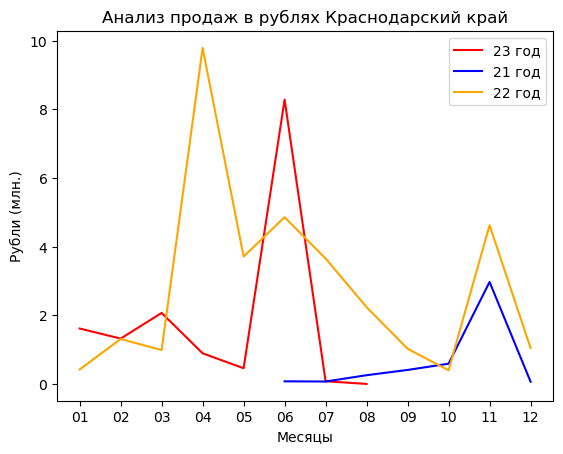

In [42]:
x = np.linspace(1, 12, 1)
plt.plot(Kr23, label='23 год', color='red')
plt.plot(Kr21, label='21 год', color='blue')
plt.plot(Kr22, label='22 год', color='orange')
plt.title('Анализ продаж в рублях Краснодарский край')
plt.xlabel('Месяцы')
plt.ylabel('Рубли (млн.)')
plt.legend(loc='upper right')

#### Динамика продаж Краснодарского края в 23 году не намного хуже 22ого года в сравнении с остальными регионами. В конце 23 года стоит ожидать продажи где-то между 21 и 22 годом. В районе 85% от 22 года.

In [43]:
warnings.filterwarnings('ignore')
K22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Краснодарский край')]
K22['Дата заявки'] = pd.to_datetime(K22['Дата заявки']).dt.strftime('%m')
K22['Дата заявки'] = K22['Дата заявки'].astype(int)

In [44]:
K22 = K22[(K22['Дата заявки'] == 9) | (K22['Дата заявки'] == 10) | (K22['Дата заявки'] == 11) | (K22['Дата заявки'] == 12)]
result = K22.groupby('Регион')['Сумма заказа  без НДС'].sum()/1000000
result = result.apply(lambda x: '{:.0f} миллионов рублей'.format(x*0.85))
resultKr = result[0]
print(resultKr,'- прогноз на конец года для Краснодарского края')

6 миллионов рублей - прогноз на конец года для Краснодарского края


In [45]:
#Взглянем на динамику по Красноярскому краю

Kra21 = df[(df['Дата заявки'].dt.year == 2021) & (df['Регион'] == 'Красноярский край')]
Kra22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Красноярский край')]
Kra23 = df[(df['Дата заявки'].dt.year == 2023) & (df['Регион'] == 'Красноярский край')]

In [46]:
warnings.filterwarnings('ignore')
Kra21['Дата заявки'] = pd.to_datetime(Kra21['Дата заявки']).dt.strftime('%m')
Kra22['Дата заявки'] = pd.to_datetime(Kra22['Дата заявки']).dt.strftime('%m')
Kra23['Дата заявки'] = pd.to_datetime(Kra23['Дата заявки']).dt.strftime('%m')

In [47]:
Kra21 = Kra21.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
Kra22 = Kra22.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
Kra23 = Kra23.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000

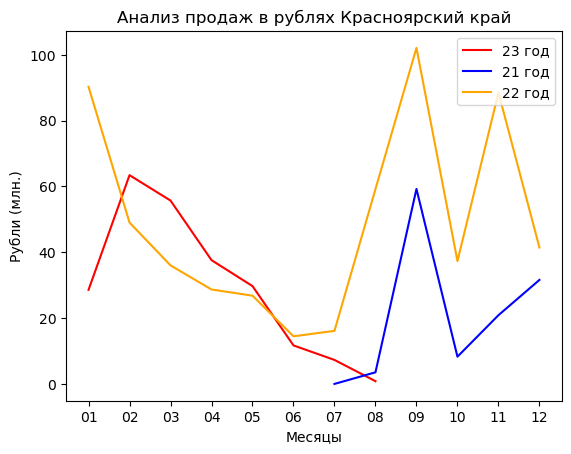

In [48]:
x = np.linspace(1, 12, 1)
plt.plot(Kra23, label='23 год', color='red')
plt.plot(Kra21, label='21 год', color='blue')
plt.plot(Kra22, label='22 год', color='orange')
plt.title('Анализ продаж в рублях Красноярский край')
plt.xlabel('Месяцы')
plt.ylabel('Рубли (млн.)')
plt.legend(loc='upper right')

#### Динамика продаж Краснодарского края в 23 году не намного хуже 22ого года в сравнении с остальными регионами. В конце 23 года стоит ожидать продажи где-то между 21 и 22 годом. В районе 80% от 22г.

In [49]:
warnings.filterwarnings('ignore')
K22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Красноярский край')]
K22['Дата заявки'] = pd.to_datetime(K22['Дата заявки']).dt.strftime('%m')
K22['Дата заявки'] = K22['Дата заявки'].astype(int)

In [50]:
K22 = K22[(K22['Дата заявки'] == 9) | (K22['Дата заявки'] == 10) | (K22['Дата заявки'] == 11) | (K22['Дата заявки'] == 12)]
result = K22.groupby('Регион')['Сумма заказа  без НДС'].sum()/1000000
result = result.apply(lambda x: '{:.0f} миллионов рублей'.format(x*0.8))
resultKra = result[0]
print(resultKra,'- прогноз на конец года для Красноярского края')

216 миллионов рублей - прогноз на конец года для Красноярского края


In [51]:
#Взглянем на динамику по Кузбассу

Ku21 = df[(df['Дата заявки'].dt.year == 2021) & (df['Регион'] == 'Кузбасс')]
Ku22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Кузбасс')]
Ku23 = df[(df['Дата заявки'].dt.year == 2023) & (df['Регион'] == 'Кузбасс')]

In [52]:
warnings.filterwarnings('ignore')
Ku21['Дата заявки'] = pd.to_datetime(Ku21['Дата заявки']).dt.strftime('%m')
Ku22['Дата заявки'] = pd.to_datetime(Ku22['Дата заявки']).dt.strftime('%m')
Ku23['Дата заявки'] = pd.to_datetime(Ku23['Дата заявки']).dt.strftime('%m')

In [53]:
Ku21 = Ku21.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
Ku22 = Ku22.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
Ku23 = Ku23.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000

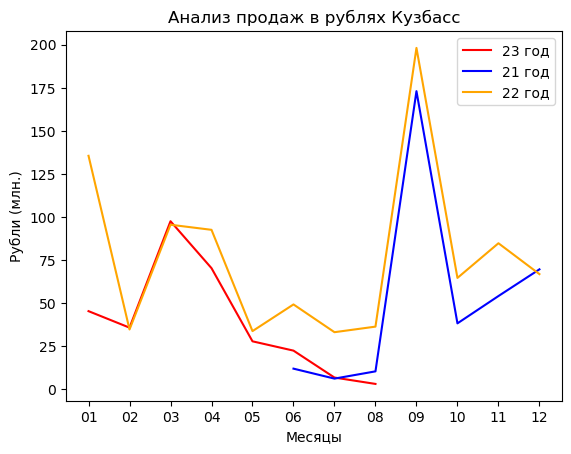

In [54]:
x = np.linspace(1, 12, 1)
plt.plot(Ku23, label='23 год', color='red')
plt.plot(Ku21, label='21 год', color='blue')
plt.plot(Ku22, label='22 год', color='orange')
plt.title('Анализ продаж в рублях Кузбасс')
plt.xlabel('Месяцы')
plt.ylabel('Рубли (млн.)')
plt.legend(loc='upper right')

#### Факт продаж в Кузбассе в самом начале, в 21 году, был очень высок. Учитывая нынешнюю динамику, в 23 году вряд ли продажи смогут достичь даже факта 21 года. Стоит ожидать в районе 80% от 22 года.

In [55]:
warnings.filterwarnings('ignore')
K22 = df[(df['Дата заявки'].dt.year == 2022) & (df['Регион'] == 'Кузбасс')]
K22['Дата заявки'] = pd.to_datetime(K22['Дата заявки']).dt.strftime('%m')
K22['Дата заявки'] = K22['Дата заявки'].astype(int)

In [56]:
K22 = K22[(K22['Дата заявки'] == 9) | (K22['Дата заявки'] == 10) | (K22['Дата заявки'] == 11) | (K22['Дата заявки'] == 12)]
result = K22.groupby('Регион')['Сумма заказа  без НДС'].sum()/1000000
result = result.apply(lambda x: '{:.0f} миллионов рублей'.format(x*0.8))
resultKu = result[0]
print(resultKu,'- прогноз на конец года для Кузбасса')

331 миллионов рублей - прогноз на конец года для Кузбасса


In [57]:
warnings.filterwarnings('ignore')
df21 = df[df['Дата заявки'].dt.year == 2021]
df22 = df[df['Дата заявки'].dt.year == 2022]
df23 = df[df['Дата заявки'].dt.year == 2023]
df21['Дата заявки'] = pd.to_datetime(df21['Дата заявки']).dt.strftime('%m')
df22['Дата заявки'] = pd.to_datetime(df22['Дата заявки']).dt.strftime('%m')
df23['Дата заявки'] = pd.to_datetime(df23['Дата заявки']).dt.strftime('%m')

In [58]:
df21 = df21.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
df22 = df22.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000
df23 = df23.groupby('Дата заявки')['Сумма заказа  без НДС'].sum() / 1000000

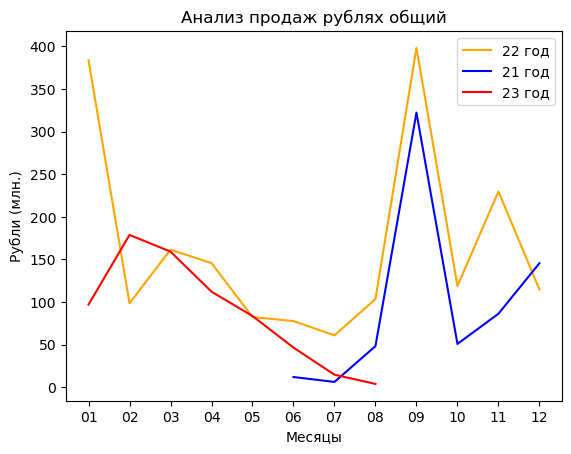

In [59]:
x = np.linspace(1, 12, 1)
plt.plot(df22, label='22 год', color='orange')
plt.plot(df21, label='21 год', color='blue')
plt.plot(df23, label='23 год', color='red')
plt.title('Анализ продаж рублях общий')
plt.xlabel('Месяцы')
plt.ylabel('Рубли (млн.)')
plt.legend(loc='upper right')

Для того, чтобы смочь сделать корректный прогноз на конец текущего года, нужно знать точную причину падения динамики начиная с 6 месяца. <br> В связи с отсутствием необходимой информации можно сделать два предположения:<br> 1. Продажи восстановятся <br> 2. Продажи не восстановятся <br> В соответствии с фактом продаж, второй вариант кажется куда более рациональным, когда первый - чересчур амбициозным.

In [63]:
ddf = df[df['Дата заявки'].dt.year == 2022]
ddf['Дата заявки'] = pd.to_datetime(ddf['Дата заявки']).dt.strftime('%m')
ddf['Дата заявки'] = ddf['Дата заявки'].astype(int)
ddf = ddf[(ddf['Дата заявки'] == 9) | (ddf['Дата заявки'] == 10) | (ddf['Дата заявки'] == 11) | (ddf['Дата заявки'] == 12)]
result = ddf.groupby('Регион')['Сумма заказа  без НДС'].sum()/1000000
result = result.apply(lambda x: '{:.0f} миллионов рублей'.format(x))
result = pd.DataFrame(result)
columns = ['Регион', 'Прогноз 23 (сент-дек)']
data = [['Алтайский край', resultA],
        ['Иркутский', resultI],
        ['Казахстан', resultK],
        ['Краснодарский край', resultKr],
        ['Красноярский край', resultKra],
        ['Кузбасс', resultKu],]
ddf = pd.DataFrame(data, columns=columns)
final = pd.merge(result, ddf, on='Регион', how='left')
final = final.rename(columns={'Сумма заказа  без НДС': 'Факт 22 (сент-дек)'})
final = final.set_index('Регион')

In [64]:
final

,Факт 22 (сент-дек),Прогноз 23 (сент-дек)
Регион,,
Алтайский край,132 миллионов рублей,106 миллионов рублей
Иркутский,16 миллионов рублей,16 миллионов рублей
Казахстан,22 миллионов рублей,11 миллионов рублей
Краснодарский край,7 миллионов рублей,6 миллионов рублей
Красноярский край,269 миллионов рублей,216 миллионов рублей
Кузбасс,414 миллионов рублей,331 миллионов рублей
